In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Porti\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,cycle,setting1,setting2,setting3,sen1,sen2,sen3,sen4,sen5,...,sen14,sen15,sen16,sen17,sen18,sen19,sen20,sen21,ttf,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,cycle,setting1,setting2,setting3,sen1,sen2,sen3,sen4,sen5,...,sen14,sen15,sen16,sen17,sen18,sen19,sen20,sen21,RUL,label
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,112,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,98,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,69,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581,82,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117,91,0


In [4]:
atributos = ['setting1', 'setting2', 'setting3','sen1','sen2', 'sen3', 'sen4', 'sen5', 
             'sen6', 'sen7', 'sen8', 'sen9', 'sen10','sen11', 'sen12', 'sen13', 'sen14', 'sen15', 
             'sen16', 'sen17', 'sen18', 'sen19', 'sen20', 'sen21']

X_train = train_data[atributos]
X_test = test_data[atributos]

y_train = train_data['label']
y_test = test_data['label']

## GridSearch para la Clasificación.

In [5]:
def clasificacion(modelo, clasif, features, params=None, score=None):
    
    """Realiza la busqueda de los mejores hiperparametros para cada modelo de regresión empleando GridSearchCV.
    
    Args:
        modelo (str): identificador del modelo.
        clasif (classifier object): Clasificador a ser optimizado
        features (list): atributos.
        params (dict): parametros del Grid Search.
        score (str): score del Grid Search.
        
    Returns:
        objetos del clasificador optimizados.
        dataframe con las predicciones y el score.
    
    """
    
    gridsearch = model_selection.GridSearchCV(estimator=clasif, param_grid= params, scoring= score, cv=5, n_jobs=-1)
    gridsearch.fit(X_train, y_train)
    y_pred = gridsearch.predict(X_test)
    
    if hasattr(gridsearch, 'predict_proba'):   
        y_score = gridsearch.predict_proba(X_test)[:,1]
    elif hasattr(gridsearch, 'decision_function'):
        y_score = gridsearch.decision_function(X_test)
    else:
        y_score = y_pred
      
    predictions = {'y_pred' : y_pred, 'y_score' : y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)
    
    return gridsearch.best_estimator_, df_predictions

## Metricas de clasificación.

In [6]:
def metricas(modelo, y_test, y_pred, y_score):
    
    metricas_clasbin = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : metrics.roc_auc_score(y_test, y_score)
                       }
    
    df_metricas = pd.DataFrame.from_dict(metricas_clasbin, orient='index')
    df_metricas.columns = [modelo] 
    
    fpr, tpr, thresh_roc = metrics.roc_curve(y_test, y_score)
    
    roc_auc = metrics.auc(fpr, tpr)
    
    roc_thresh = {
                  'Threshold' : thresh_roc,
                  'TPR' : tpr, 
                  'FPR' : fpr
                 }
    
    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)
    
    precision, recall, thresh_prc = metrics.precision_recall_curve(y_test, y_score)
    
    thresh_prc = np.append(thresh_prc,1)
    
    prc_thresh = {
                  'Threshold' : thresh_prc, 
                  'Precision' : precision, 
                  'Recall' : recall
                 }
    
    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)
    print('\n')
    print('-----------------------------------------------------------')
    print(modelo, '\n')
    
    print('Matriz de confusión:\n')
    print(metrics.confusion_matrix(y_test, y_pred))
    
    print('\nReporte de clasificación:\n')
    print(metrics.classification_report(y_test, y_pred))
    
    print('\nMetricas:')
    print(df_metricas)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False )
    fig.set_size_inches(10,5)

    ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f'% roc_auc)
    ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax1.set_xlim([-0.05, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.legend(loc="lower right")

    ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.legend(loc="lower left")
    
    return df_metricas, df_roc_thresh, df_prc_thresh

### Regresión Logística


Mejores parametros:
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)


-----------------------------------------------------------
Logistic Regression 

Matriz de confusión:

[[73  2]
 [11 14]]

Reporte de clasificación:

             precision    recall  f1-score   support

          0       0.87      0.97      0.92        75
          1       0.88      0.56      0.68        25

avg / total       0.87      0.87      0.86       100


Metricas:
           Logistic Regression
Accuracy              0.870000
Precision             0.875000
Recall                0.560000
F1 Score              0.682927
ROC AUC               0.981867


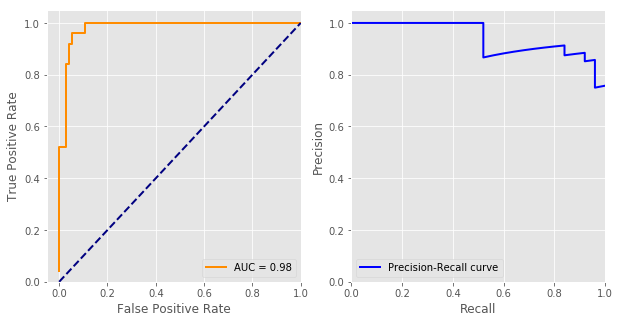

In [7]:
modelo = 'Logistic Regression'
clf_lgr = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgr, pred_lgr = clasificacion(modelo, clf_lgr, atributos, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_lgr)

metricas_lgr, roc_lgr, prc_lgr = metricas(modelo, y_test, pred_lgr.y_pred, pred_lgr.y_score)

### Árboles de decisión


Mejores parametros:
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')


-----------------------------------------------------------
Decision Tree 

Matriz de confusión:

[[74  1]
 [11 14]]

Reporte de clasificación:

             precision    recall  f1-score   support

          0       0.87      0.99      0.93        75
          1       0.93      0.56      0.70        25

avg / total       0.89      0.88      0.87       100


Metricas:
           Decision Tree
Accuracy        0.880000
Precision       0.933333
Recall          0.560000
F1 Score        0.700000
ROC AUC         0.945067


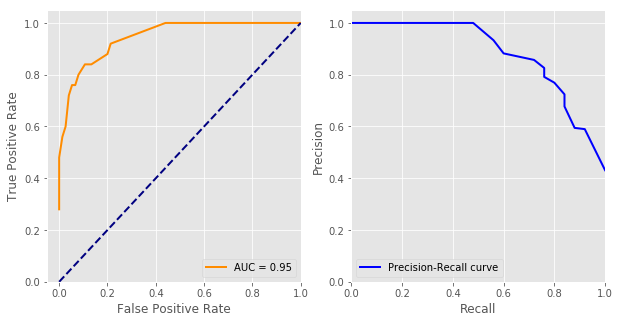

In [8]:
modelo = 'Decision Tree'
clf_dt = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [2, 3, 4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dt, pred_dt = clasificacion(modelo, clf_dt, atributos, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_dt)

metricas_dt, roc_dt, prc_dt = metricas(modelo, y_test, pred_dt.y_pred, pred_dt.y_score)

### Bosques aleatorios


Mejores parametros:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)


-----------------------------------------------------------
Random Forest 

Matriz de confusión:

[[74  1]
 [ 8 17]]

Reporte de clasificación:

             precision    recall  f1-score   support

          0       0.90      0.99      0.94        75
          1       0.94      0.68      0.79        25

avg / total       0.91      0.91      0.90       100


Metricas:
           Random Forest
Accuracy        0.910000
Precision       0.944444
Recall          0.680000
F1 Score        0.790698
ROC AUC         0.980267


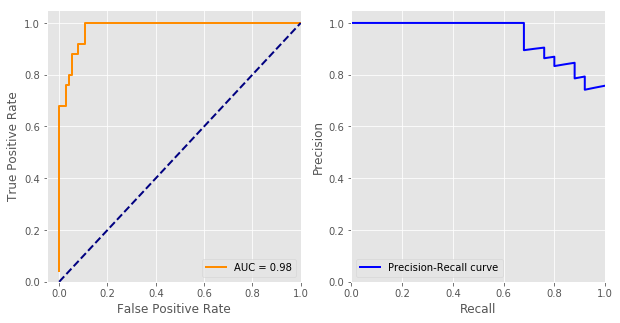

In [9]:
modelo = 'Random Forest'
clf_rfc = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfc, pred_rfc = clasificacion(modelo, clf_rfc, atributos, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_rfc)

metricas_rfc, roc_rfc, prc_rfc = metricas(modelo, y_test, pred_rfc.y_pred, pred_rfc.y_score)

### Vectores soportados - Clasificador


Mejores parametros:
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)


-----------------------------------------------------------
Support Vector Classification 

Matriz de confusión:

[[74  1]
 [ 8 17]]

Reporte de clasificación:

             precision    recall  f1-score   support

          0       0.90      0.99      0.94        75
          1       0.94      0.68      0.79        25

avg / total       0.91      0.91      0.90       100


Metricas:
           Support Vector Classification
Accuracy                        0.910000
Precision                       0.944444
Recall                          0.680000
F1 Score                        0.790698
ROC AUC                         0.891733


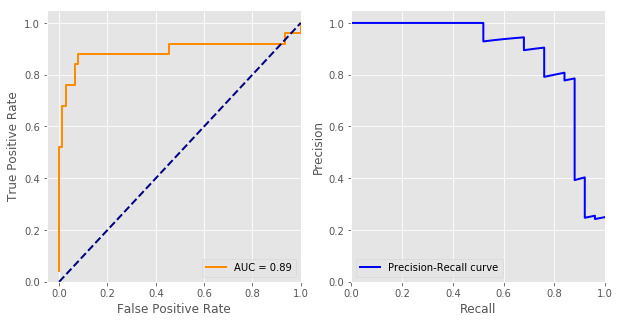

In [10]:
modelo = 'Support Vector Classification'
clf_svc = SVC(kernel='rbf', random_state=123)
gs_params = {'C': [1.0]}
gs_score = 'roc_auc'

clf_svc, pred_svc = clasificacion(modelo, clf_svc, atributos, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_svc)

metricas_svc, roc_svc, prc_svc = metricas(modelo, y_test, pred_svc.y_pred, pred_svc.y_score)

### Vectores lineales soportados - Clasificador


Mejores parametros:
 LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
     verbose=0)


-----------------------------------------------------------
Linear Support Vector Classification 

Matriz de confusión:

[[75  0]
 [15 10]]

Reporte de clasificación:

             precision    recall  f1-score   support

          0       0.83      1.00      0.91        75
          1       1.00      0.40      0.57        25

avg / total       0.88      0.85      0.82       100


Metricas:
           Linear Support Vector Classification
Accuracy                               0.850000
Precision                              1.000000
Recall                                 0.400000
F1 Score                               0.571429
ROC AUC                                0.971733


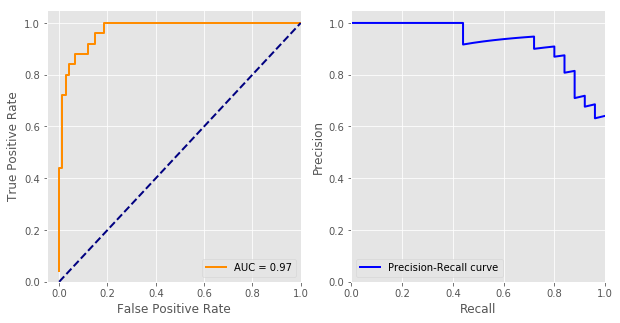

In [11]:
modelo = 'Linear Support Vector Classification'
clf_svl = LinearSVC(random_state=123)
gs_params = {'C': [.01 ,.1 ,1.0]}
gs_score = 'roc_auc'

clf_svl, pred_svl = clasificacion(modelo, clf_svl, atributos, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_svl)

metricas_svl, roc_svl, prc_svl = metricas(modelo, y_test, pred_svl.y_pred, pred_svl.y_score)

### K vecinos más próximos


Mejores parametros:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
           weights='uniform')


-----------------------------------------------------------
KNN 

Matriz de confusión:

[[74  1]
 [ 8 17]]

Reporte de clasificación:

             precision    recall  f1-score   support

          0       0.90      0.99      0.94        75
          1       0.94      0.68      0.79        25

avg / total       0.91      0.91      0.90       100


Metricas:
                KNN
Accuracy   0.910000
Precision  0.944444
Recall     0.680000
F1 Score   0.790698
ROC AUC    0.935200


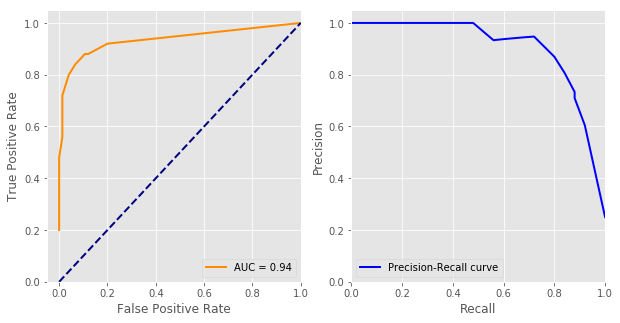

In [12]:
modelo = 'KNN'
clf_knn = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9, 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knn, pred_knn = clasificacion(modelo, clf_knn, atributos, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_knn)

metricas_knn, roc_knn, prc_knn = metricas(modelo, y_test, pred_knn.y_pred, pred_knn.y_score)

In [13]:
#comparando todas las metricas
metricas_bc = pd.concat([metricas_lgr, metricas_dt, metricas_rfc, metricas_svc, metricas_svl, metricas_knn], axis=1)
metricas_bc

,Logistic Regression,Decision Tree,Random Forest,Support Vector Classification,Linear Support Vector Classification,KNN
Accuracy,0.870000,0.880000,0.910000,0.910000,0.850000,0.910000
Precision,0.875000,0.933333,0.944444,0.944444,1.000000,0.944444
Recall,0.560000,0.560000,0.680000,0.680000,0.400000,0.680000
F1 Score,0.682927,0.700000,0.790698,0.790698,0.571429,0.790698
ROC AUC,0.981867,0.945067,0.980267,0.891733,0.971733,0.935200


Text(0.5,1,'Precision Recall Curve')

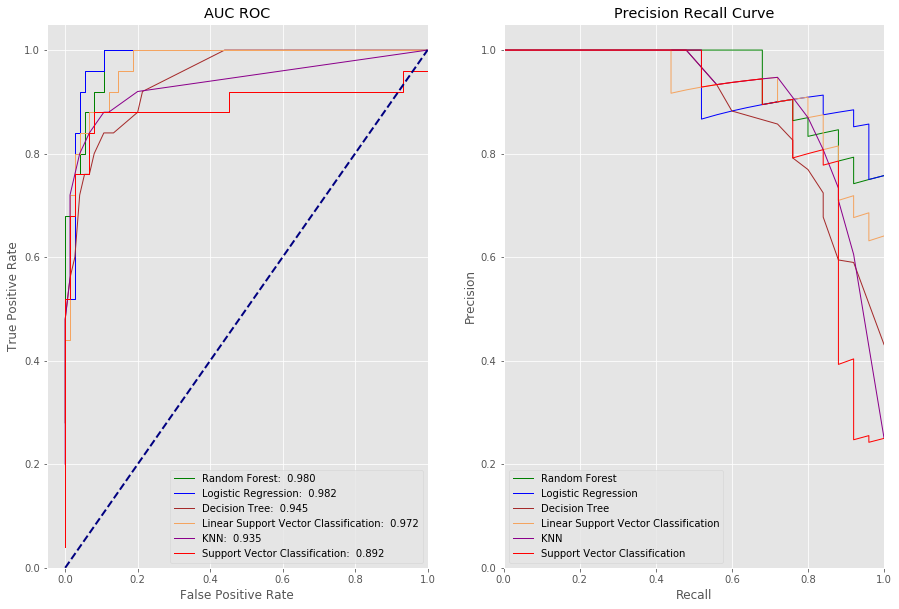

In [14]:
# Graficando las curvas ROC y Precisión-Recall de todos los algoritmos.

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False )
fig.set_size_inches(15,10)

ax1.plot(roc_rfc.FPR, roc_rfc.TPR, color='green', lw=1, label= metricas_rfc.columns.values.tolist()[0] + ':  %.3f' % metricas_rfc.at['ROC AUC', metricas_rfc.columns.values.tolist()[0]])
ax1.plot(roc_lgr.FPR, roc_lgr.TPR, color='blue', lw=1, label= metricas_lgr.columns.values.tolist()[0] + ':  %.3f' % metricas_lgr.at['ROC AUC', metricas_lgr.columns.values.tolist()[0]])
ax1.plot(roc_dt.FPR, roc_dt.TPR, color='brown', lw=1, label= metricas_dt.columns.values.tolist()[0] + ':  %.3f' % metricas_dt.at['ROC AUC', metricas_dt.columns.values.tolist()[0]])
ax1.plot(roc_svl.FPR, roc_svl.TPR, color='sandybrown', lw=1, label= metricas_svl.columns.values.tolist()[0] + ':  %.3f' % metricas_svl.at['ROC AUC', metricas_svl.columns.values.tolist()[0]])
ax1.plot(roc_knn.FPR, roc_knn.TPR, color='darkmagenta', lw=1, label= metricas_knn.columns.values.tolist()[0] + ':  %.3f' % metricas_knn.at['ROC AUC', metricas_knn.columns.values.tolist()[0]])
ax1.plot(roc_svc.FPR, roc_svc.TPR, color='red', lw=1, label= metricas_svc.columns.values.tolist()[0] + ':  %.3f' % metricas_svc.at['ROC AUC', metricas_svc.columns.values.tolist()[0]])
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([-0.05, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc="lower right")
ax1.set_title('AUC ROC')

ax2.plot(prc_rfc.Recall, prc_rfc.Precision, color='green', lw=1, label= metricas_rfc.columns.values.tolist()[0])
ax2.plot(prc_lgr.Recall, prc_lgr.Precision, color='blue', lw=1, label= metricas_lgr.columns.values.tolist()[0])
ax2.plot(prc_dt.Recall, prc_dt.Precision, color='brown', lw=1, label= metricas_dt.columns.values.tolist()[0])
ax2.plot(prc_svl.Recall, prc_svl.Precision, color='sandybrown', lw=1, label= metricas_svl.columns.values.tolist()[0])
ax2.plot(prc_knn.Recall, prc_knn.Precision, color='darkmagenta', lw=1, label= metricas_knn.columns.values.tolist()[0])
ax2.plot(prc_svc.Recall, prc_svc.Precision, color='red', lw=1, label= metricas_svc.columns.values.tolist()[0])
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend(loc="lower left")
ax2.set_title('Precision Recall Curve')